# LSTM Stock Price Prediction Tutorial with Visualizations

## Part 1: Understanding LSTM Basics

A plot of the simple sequence used in the basic LSTM example.
A graph showing the training loss over epochs for the simple LSTM model.


## Part 2: Preparing Stock Price Data for LSTM

A plot of the raw stock price data from 2010 to 2023.
A visualization of the normalized stock price data.
An example of a single sequence used for training the LSTM model.


## Part 3: Building and Training the LSTM Model

A visual representation of the LSTM model architecture (saved as an image file).
A plot showing the training and validation loss over epochs during model training.


## Part 4: Making Predictions and Evaluating the Model

A graph comparing actual stock prices with predicted prices over the entire test period.
A zoomed-in version of the comparison for better visibility of recent predictions.
A plot of the prediction error over time.


**These visualizations help to illustrate**:

The nature of the time series data we're working with.
The effect of data normalization.
The structure of input sequences for the LSTM.
The model's architecture and training progress.
The accuracy of predictions and how they compare to actual stock prices.
The distribution and trends in prediction errors.

In [17]:
#!pip install pydot
#!pip install graphviz
#!pip install pydotplus
#!pip install pydot-ng

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model

Part 1: Understanding LSTM Basics


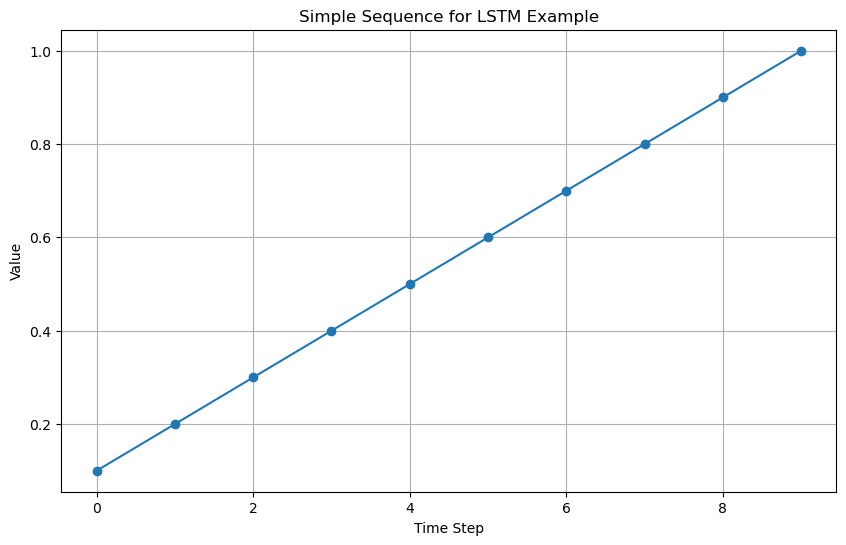

In [3]:
# Part 1: Understanding LSTM Basics
print("Part 1: Understanding LSTM Basics")

# Create a simple sequence
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Visualize the sequence
plt.figure(figsize=(10, 6))
plt.plot(sequence, marker='o')
plt.title('Simple Sequence for LSTM Example')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [17]:
# Prepare data for LSTM (reshape to [samples, time steps, features])
X = sequence[:-1].reshape(1, 9, 1)
y = sequence[-1].reshape(1, 1)

# Create a simple LSTM model
model = Sequential([
    LSTM(10, input_shape=(9, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=200, verbose=0)

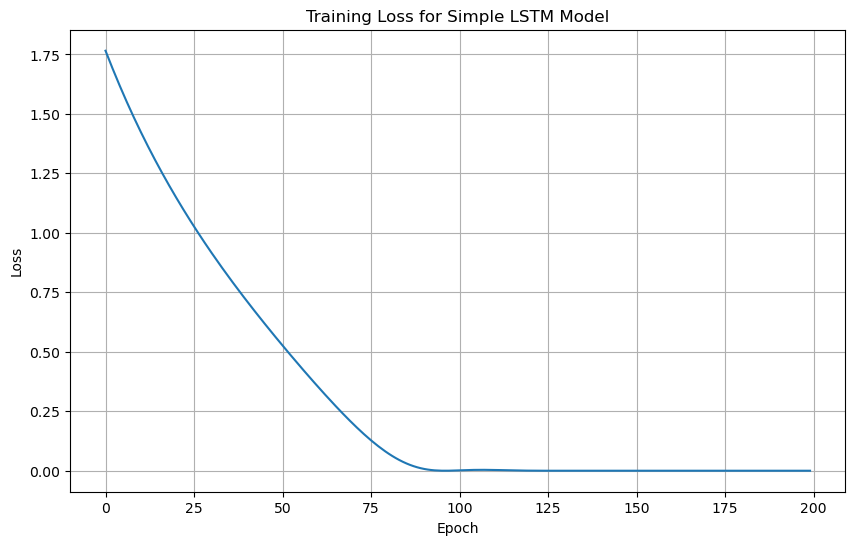

In [19]:
# Visualize the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Training Loss for Simple LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [21]:
# Predict the next value
next_value = model.predict(X)
print(f"Actual value: {y[0][0]}, Predicted value: {next_value[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Actual value: 1.0, Predicted value: 0.9995741844177246


In [23]:
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,475 (5.77 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 984 (3.85 KB)

In [25]:
# Visualize the model architecture
plot_model(model, to_file='model_architecture_0.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot_ng' has no attribute 'PydotException'


Part 2: Preparing Stock Price Data


[*********************100%***********************]  1 of 1 completed


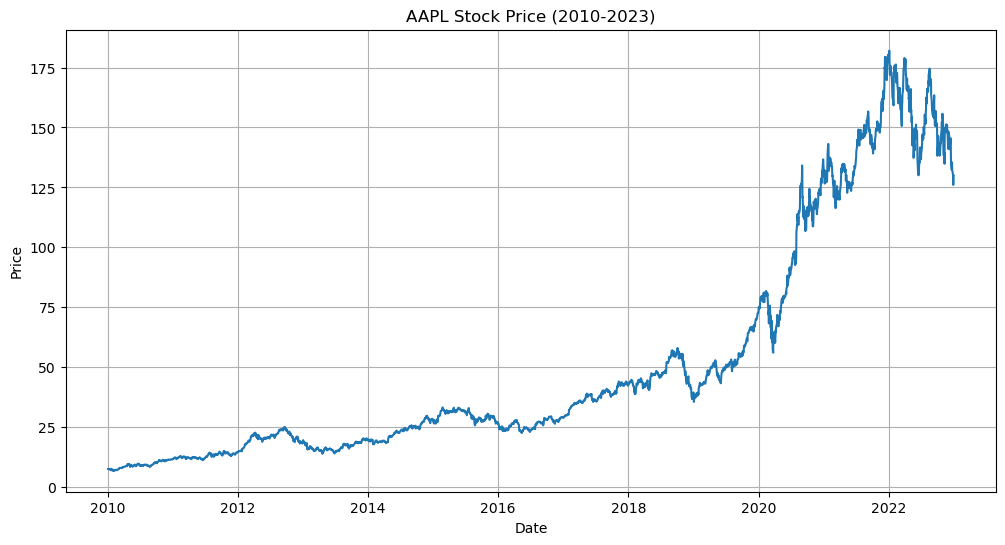

In [20]:
# Part 2: Preparing Stock Price Data for LSTM
print("\nPart 2: Preparing Stock Price Data")

# Fetch stock data
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(ticker, start=start_date, end=end_date)['Close']

# Visualize the raw stock price data
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title(f'{ticker} Stock Price (2010-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

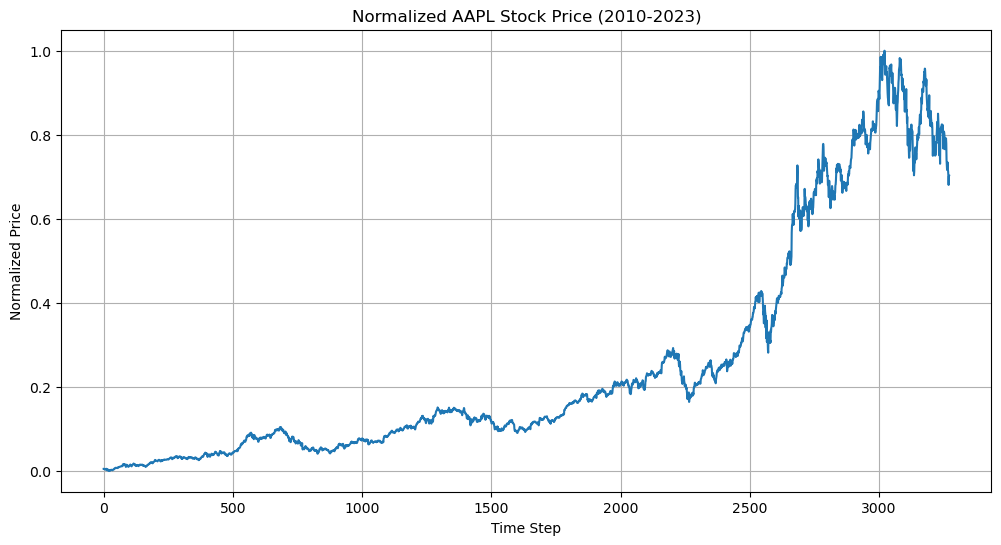

In [22]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Visualize the normalized data
plt.figure(figsize=(12, 6))
plt.plot(scaled_data)
plt.title(f'Normalized {ticker} Stock Price (2010-2023)')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.grid(True)
plt.show()

In [24]:
# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of historical data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

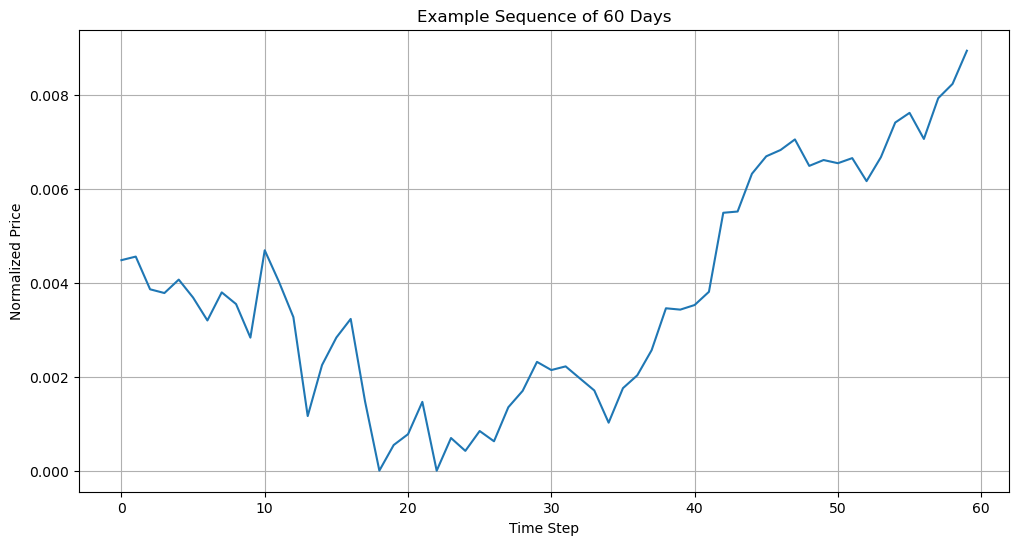

In [26]:
# Visualize a single sequence
plt.figure(figsize=(12, 6))
plt.plot(X[0])
plt.title(f'Example Sequence of {seq_length} Days')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.grid(True)
plt.show()

In [28]:
# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (2569, 60)
Testing data shape: (643, 60)


In [30]:
# Part 3: Building and Training the LSTM Model
print("\nPart 3: Building and Training the LSTM Model")

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


Part 3: Building and Training the LSTM Model


In [32]:
# Create the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Vitali\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
# Attempt to visualize the model architecture
try:
    from tensorflow.keras.utils import plot_model
    
    # Check if pydot is installed
    import importlib
    if importlib.util.find_spec("pydot") is None:
        raise ImportError("pydot is not installed")
    
    # If we get here, pydot is installed, so we can try to plot the model
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
    print("Model architecture saved as 'model_architecture.png'")
except ImportError as e:
    print(f"Unable to plot model architecture. Error: {e}")
    print("To enable model architecture visualization, please install pydot and graphviz:")
    print("pip install pydot graphviz")
    print("You may also need to install graphviz system package. On Ubuntu/Debian:")
    print("sudo apt-get install graphviz")
    print("On macOS with Homebrew:")
    print("brew install graphviz")
except Exception as e:
    print(f"An unexpected error occurred while trying to plot the model: {e}")

# Continue with model summary as an alternative
print("\nModel Summary:")
model.summary()

An unexpected error occurred while trying to plot the model: module 'pydotplus' has no attribute 'PydotException'

Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Visualize the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
print("Model architecture saved as 'model_architecture.png'")

AttributeError: module 'pydotplus' has no attribute 'PydotException'

Part 1: Understanding LSTM Basics


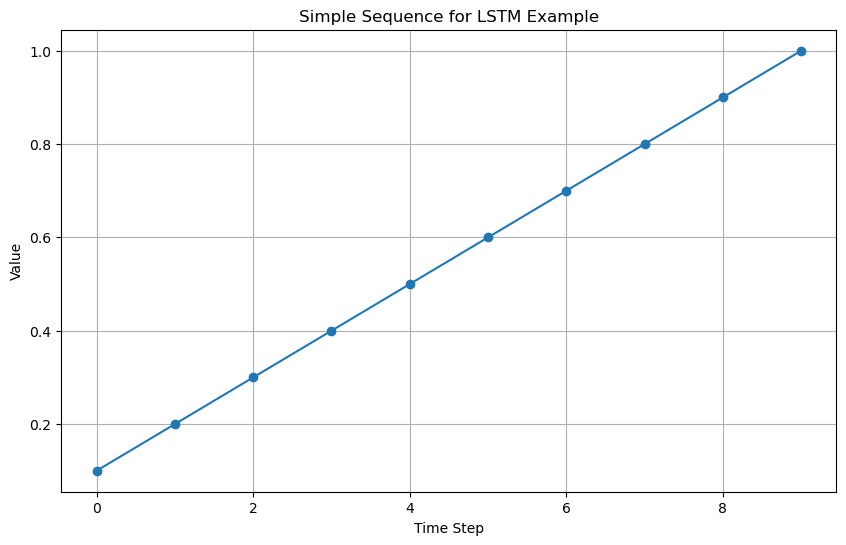

C:\Users\Vitali\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


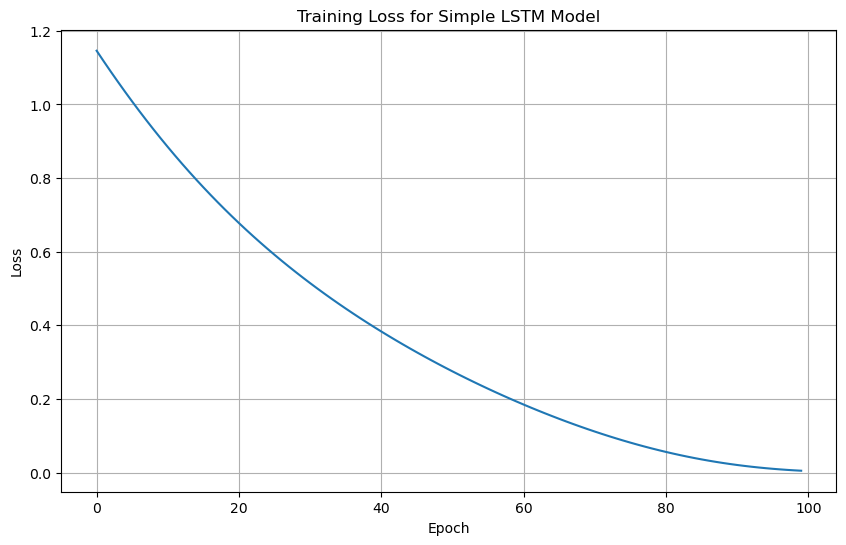

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Actual value: 1.0, Predicted value: 0.937134861946106

Part 2: Preparing Stock Price Data


[*********************100%***********************]  1 of 1 completed


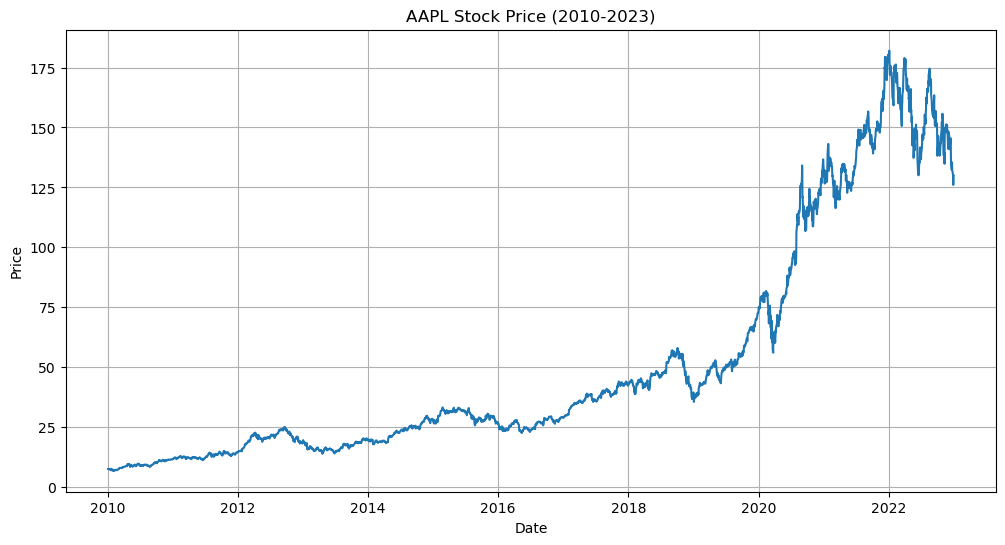

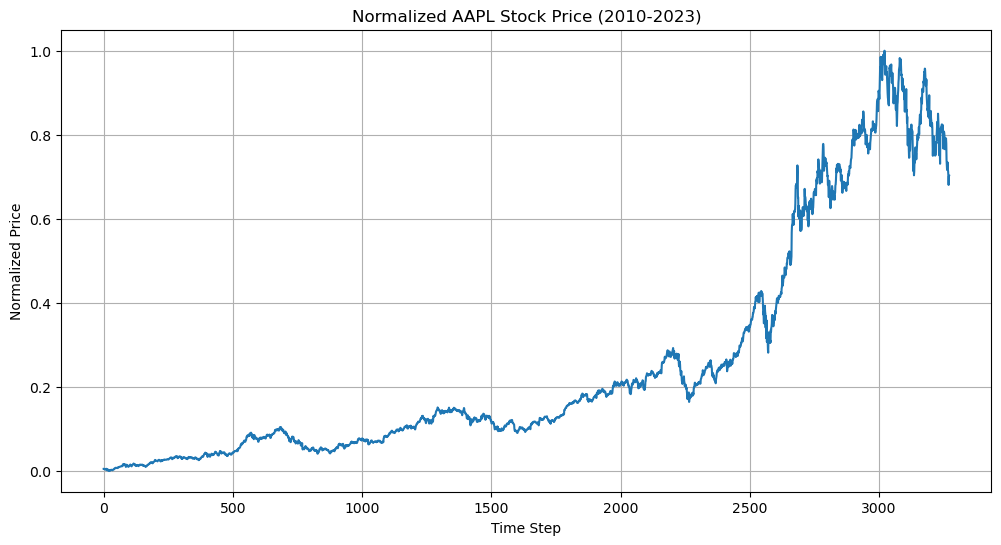

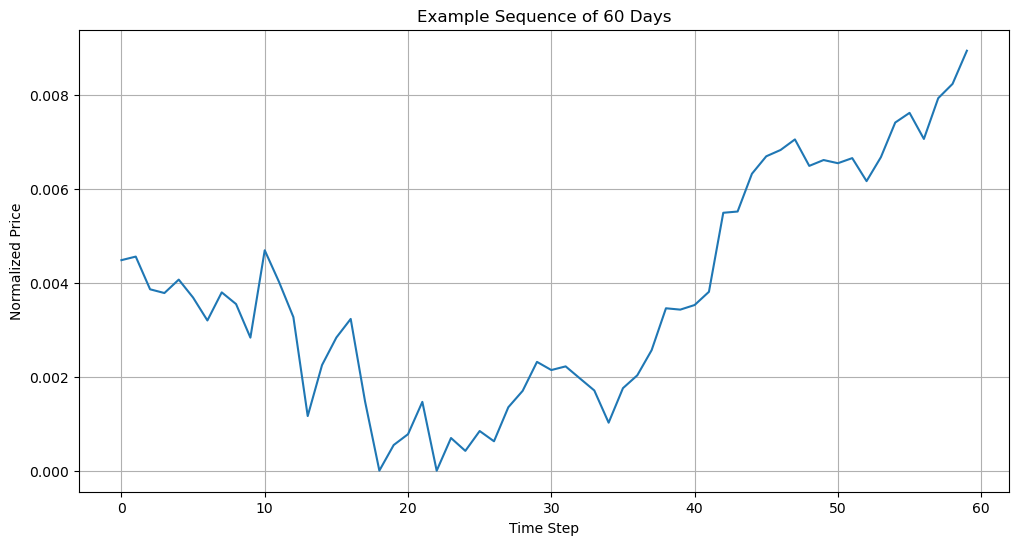

Training data shape: (2569, 60)
Testing data shape: (643, 60)

Part 3: Building and Training the LSTM Model
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model architecture saved as 'model_architecture.png'


C:\Users\Vitali\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


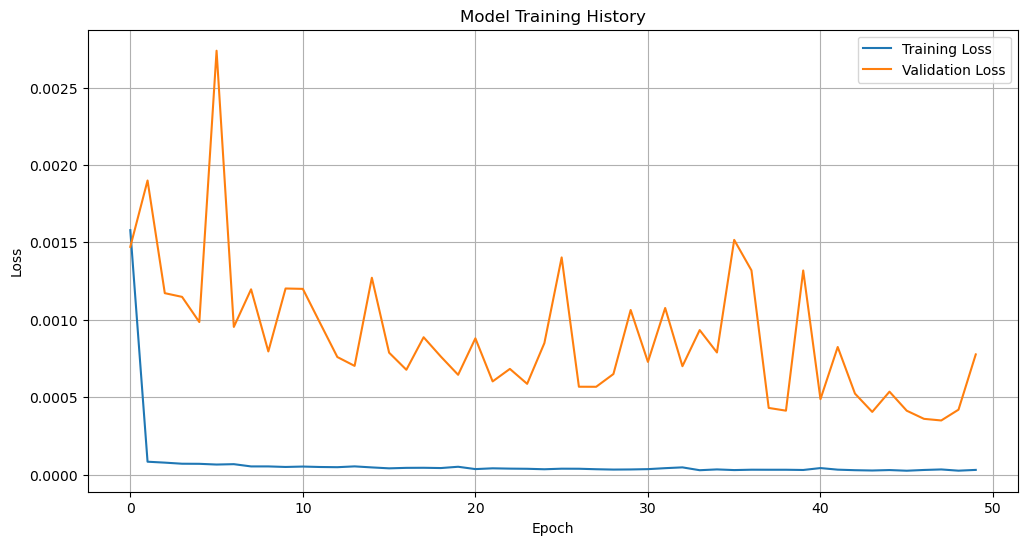

Model training completed.

Part 4: Making Predictions and Evaluating the Model
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Train RMSE: 1.1400286922647178
Test RMSE: 4.8801223125736515


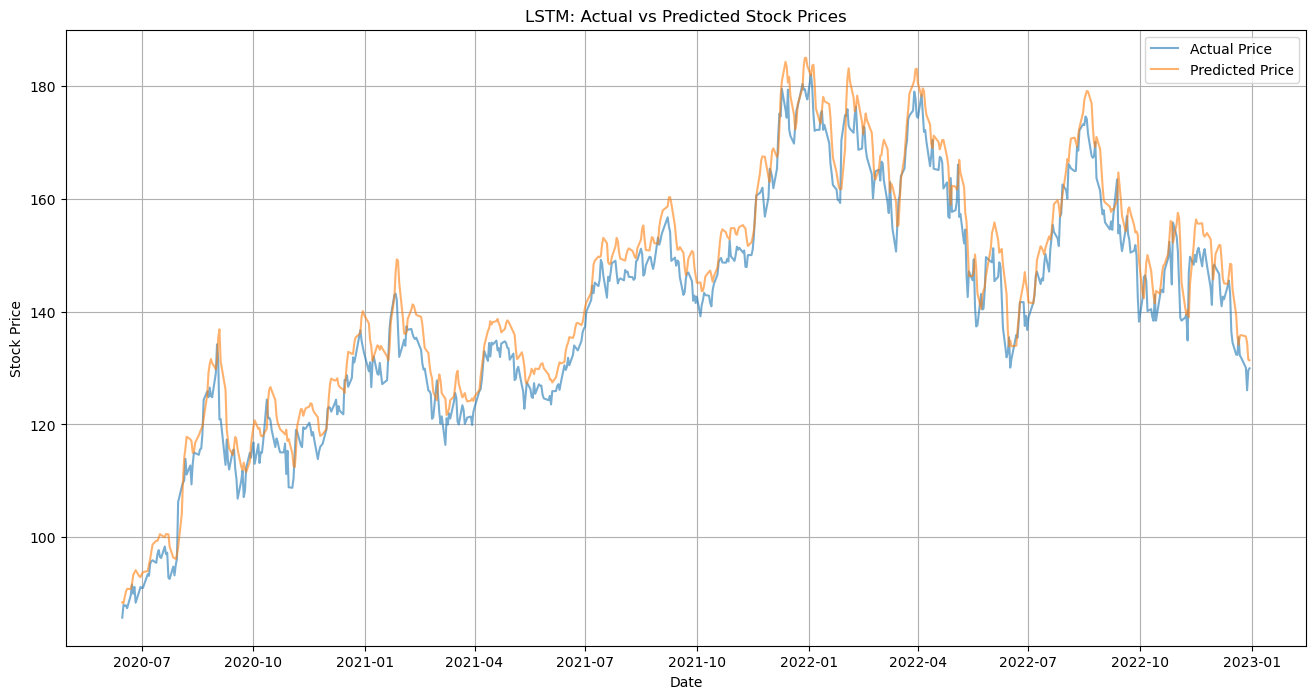

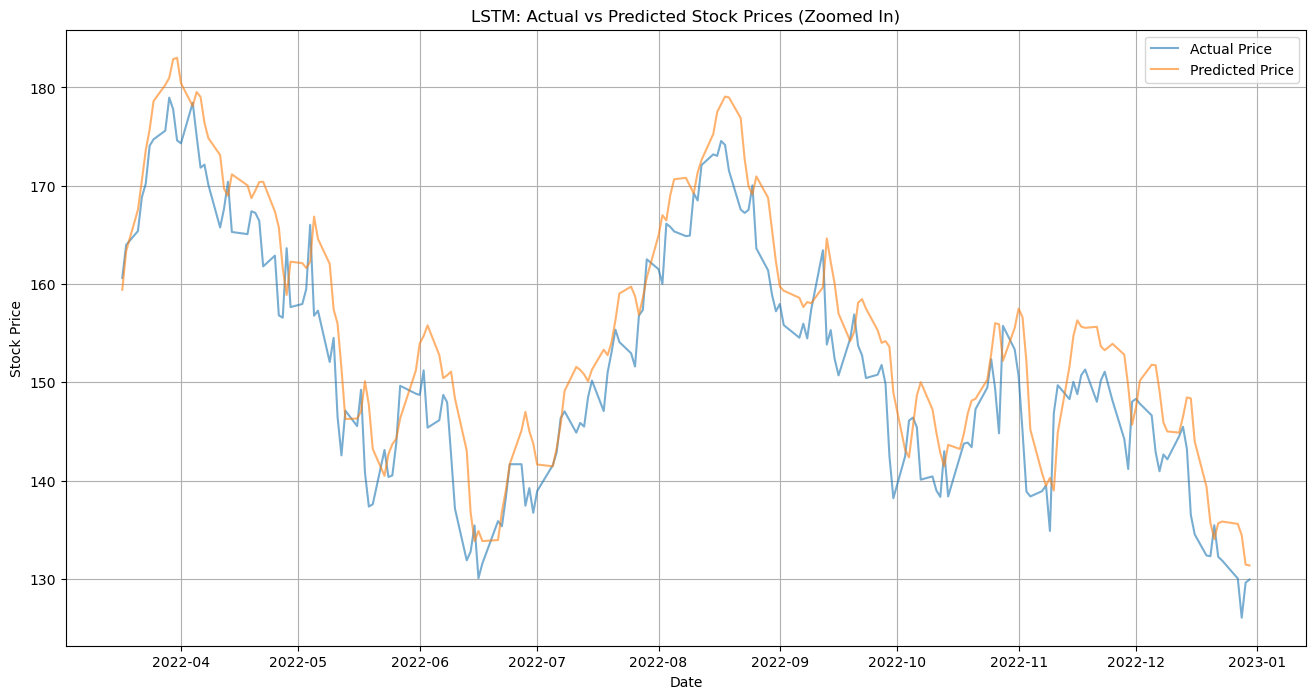

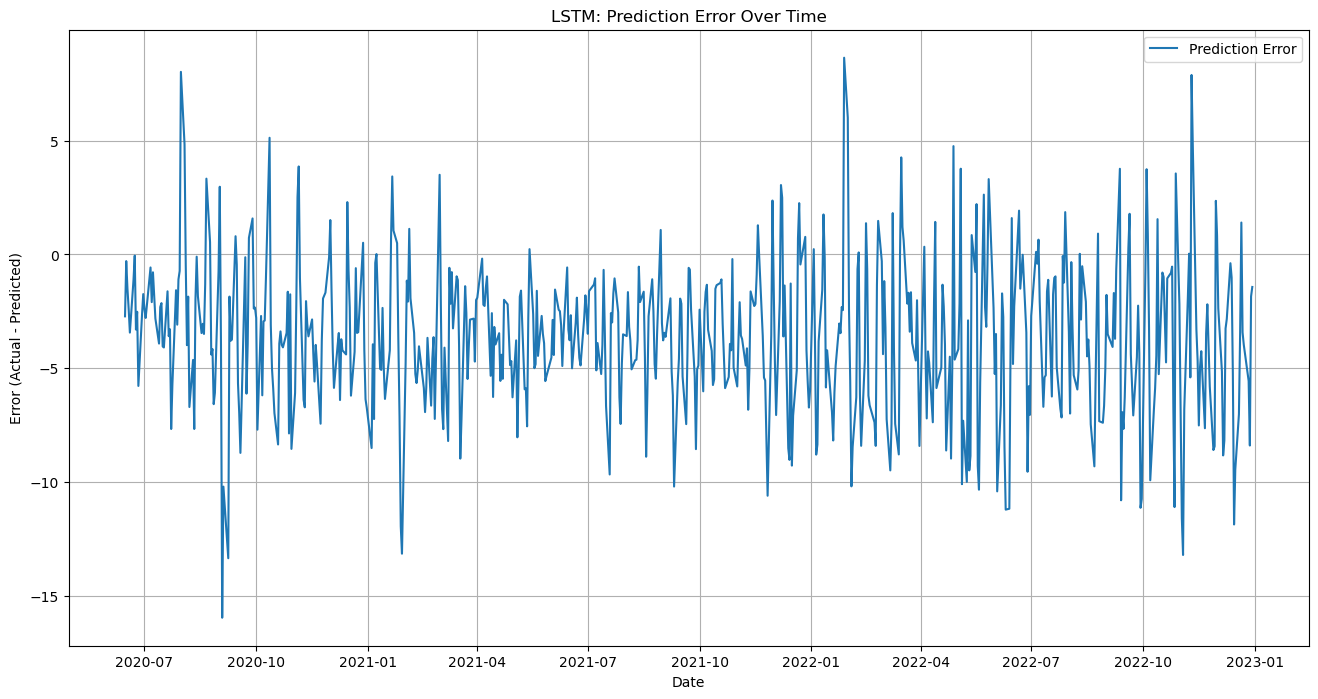

Visualization completed. Check the generated plots for insights.


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)

# Visualize the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Model training completed.")

# Part 4: Making Predictions and Evaluating the Model

print("\nPart 4: Making Predictions and Evaluating the Model")

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(np.mean((train_predictions - y_train_inv) ** 2))
test_rmse = np.sqrt(np.mean((test_predictions - y_test_inv) ** 2))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Visualize predictions vs actual prices
plt.figure(figsize=(16,8))
plt.plot(data.index[train_size+seq_length:], y_test_inv, label='Actual Price', alpha=0.6)
plt.plot(data.index[train_size+seq_length:], test_predictions, label='Predicted Price', alpha=0.6)
plt.title('LSTM: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Zoom in on a smaller time frame for better visualization
zoom_start = -200  # Last 200 data points
plt.figure(figsize=(16,8))
plt.plot(data.index[train_size+seq_length:][zoom_start:], y_test_inv[zoom_start:], label='Actual Price', alpha=0.6)
plt.plot(data.index[train_size+seq_length:][zoom_start:], test_predictions[zoom_start:], label='Predicted Price', alpha=0.6)
plt.title('LSTM: Actual vs Predicted Stock Prices (Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Visualize prediction error
error = y_test_inv - test_predictions
plt.figure(figsize=(16,8))
plt.plot(data.index[train_size+seq_length:], error, label='Prediction Error')
plt.title('LSTM: Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Error (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.show()

print("Visualization completed. Check the generated plots for insights.")